In [3]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind ,shapiro , variation
from statsmodels.stats.power import ttest_power
from statsmodels.stats import weightstats as stests
import os
import statsmodels.stats.power as snp

# Problem 1

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data (Wholesale Customer.csv) consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel/Restaurant/Café HoReCa, Retail).


In [4]:
os.chdir('C:\\Users\\Sony\\Desktop\\Great Lakes\\Statistics\\SMDM Project')

In [46]:
df = pd.read_csv('Wholesale Customer.csv')

In [47]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


# 1.1. Use methods of descriptive statistics to summarize data.

In [48]:
# Use methods of descriptve statistics to summarize data
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440,NaN,NaN,NaN,220.5,127.161,1,110.75,220.5,330.25,440
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943


In [49]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [9]:
# Which Region and which channel seems to spend more?
df[['Channel','Region','Buyer/Spender']].groupby ('Channel').sum()
#Hotel in channel seems to spend more. Retail in channel seems to spend less.

,Buyer/Spender
Channel,
Hotel,71034
Retail,25986


In [199]:
# Which Region and which channel seems to spend less?
df[['Channel','Region','Buyer/Spender']].groupby ('Region').sum()

#other in Region seems to spend more. Oporto in Region to spend less.


,Buyer/Spender
Region,
Lisbon,18095
Oporto,14899
Other,64026


# 1.2. There are 6 different varieties of items are considered.

In [9]:
# There are 6 different varieties of items are considered.
#Do all varieties show similar behaviour across Region and Channel?


df1 = df.groupby(['Channel', 'Region'])[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].count()
df1


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Channel Region                                                              
Hotel   Lisbon     59    59       59      59                59            59
        Oporto     28    28       28      28                28            28
        Other     211   211      211     211               211           211
Retail  Lisbon     18    18       18      18                18            18
        Oporto     19    19       19      19                19            19
        Other     105   105      105     105               105           105

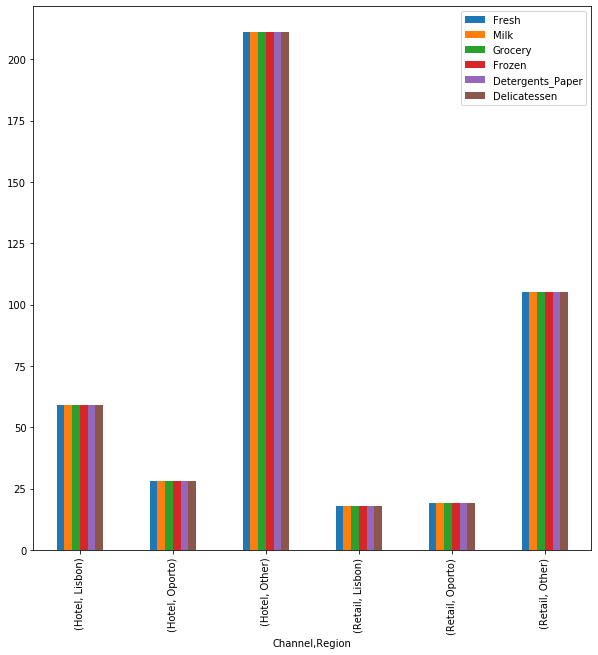

In [10]:
df1.plot(kind='bar',figsize = (10,10))

# 1.3. On the basis of the descriptive measure of variability,

In [265]:
coeff_var_Fresh = (df['Fresh'].std() / df['Fresh'].mean()) * 100
coeff_var_Fresh

105.39179237473148

In [267]:
coeff_var_Milk = (df['Milk'].std() / df['Milk'].mean()) * 100
coeff_var_Milk

127.32985840065413

In [268]:
coeff_var_Grocery = (df['Grocery'].std() / df['Grocery'].mean()) * 100
coeff_var_Grocery

119.51743730016824

In [269]:
coeff_var_Frozen = (df['Frozen'].std() / df['Frozen'].mean()) * 100
coeff_var_Frozen

158.03323836352914

In [270]:
coeff_var_Detergents_Paper = (df['Detergents_Paper'].std() / df['Detergents_Paper'].mean()) * 100
coeff_var_Detergents_Paper

165.46471385005154

In [271]:
coeff_var_Delicatessen = (df['Delicatessen'].std() / df['Delicatessen'].mean()) * 100
coeff_var_Delicatessen

184.94068981158384

# 1.4. Are there any outliers in the data?

In [26]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

In [27]:
IQR = q3-q1

In [28]:
df3 = ((df <(q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).sum()

In [29]:
df3

Buyer/Spender        0
Channel              0
Delicatessen        27
Detergents_Paper    30
Fresh               20
Frozen              43
Grocery             24
Milk                28
Region               0
dtype: int64

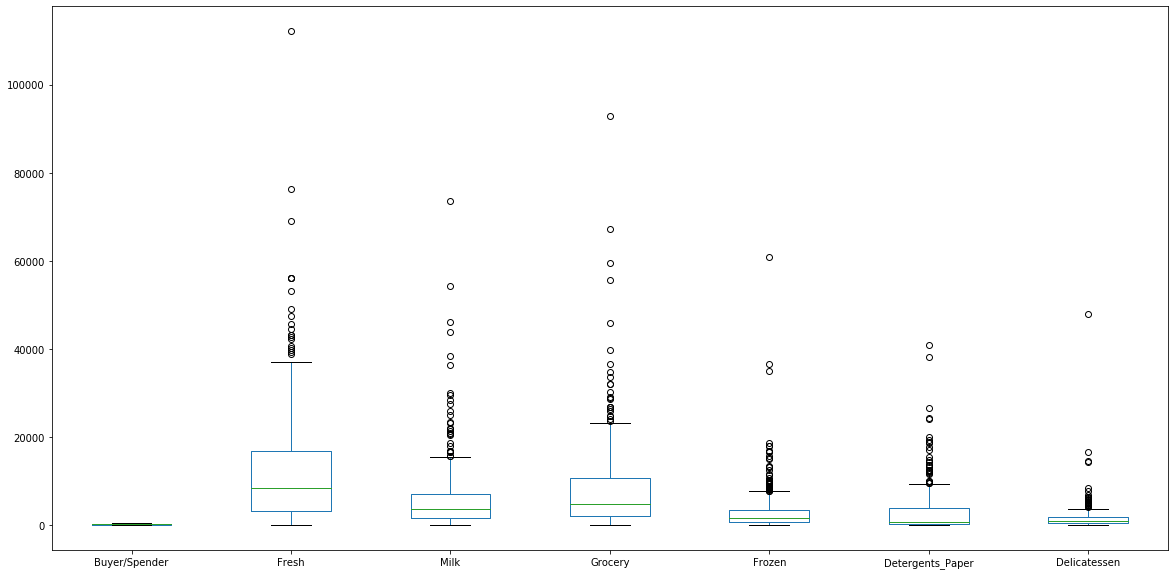

In [33]:
df.plot(kind = 'box' , figsize = (20,10))

# 1.5. On the basis of this report, what are the recommendations?





# Problem 2¶

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey.csv file).


In [10]:

Survey = pd.read_csv('Survey-1.csv')

In [11]:
Survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [13]:
Survey.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,62,NaN,NaN,NaN,31.5,18.0416,1,16.25,31.5,46.75,62
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62,NaN,NaN,NaN,21.129,1.43131,18,20,21,22,26
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62,NaN,NaN,NaN,3.12903,0.377388,2.3,2.9,3.15,3.4,3.9
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62,NaN,NaN,NaN,48.5484,12.0809,25,40,50,55,80
Social Networking,62,NaN,NaN,NaN,1.51613,0.844305,0,1,1,2,4


# Part I

2.1. For this data, construct the following contingency tables (Keep Gender as row variable)


In [274]:
#2.1.1 Gender and Major
Survey1 = pd.crosstab(Survey['Gender'] ,Survey['Major'])

In [275]:
Survey1


Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [272]:
#2.1.2 Gender and Grad Intention
Survey2 = pd.crosstab(Survey['Gender'] ,Survey['Grad Intention'],margins = False)

In [273]:
Survey2

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [276]:
#2.1.3 Gender and Employment
Survey3 = pd.crosstab(Survey['Gender'] ,Survey['Employment'],margins = False)

In [277]:
Survey3

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [278]:
#2.1.4. Gender and Computer

Survey4 = pd.crosstab(Survey['Gender'] ,Survey['Computer'],margins = False)

In [279]:
Survey4

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


# 2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following questions

# 2.2.1. What is the probability that a randomly selected CMSU student will be male? What is the probability that a randomly selected CMSU student will be female?

In [53]:
Survey5 = Survey.groupby(['Gender']).size().to_frame('count').reset_index()

In [54]:
Survey5

,Gender,count
0,Female,33
1,Male,29


In [67]:
#What is the probability that a randomly selected CMSU student will be male?
count_of_male = 29
Total_count = 62
Prob_of_Male = count_of_male/Total_count
Prob_of_Male


0.46774193548387094

In [69]:
#What is the probability that a randomly selected CMSU student will be Female? 
count_of_Female = 33
Total_count = 62
Prob_of_FeMale = count_of_Female/Total_count
Prob_of_FeMale

0.532258064516129

# 2.2.2. Find the conditional probability of different majors among the male students in CMSU. Find the conditional probability of different majors among the female students of CMSU.

In [70]:
Survey6 = Survey.groupby(['Major','Gender']).size().to_frame('count').reset_index()

In [71]:
Survey6

,Major,Gender,count
0,Accounting,Female,3
1,Accounting,Male,4
2,CIS,Female,3
3,CIS,Male,1
4,Economics/Finance,Female,7
5,Economics/Finance,Male,4
6,International Business,Female,4
7,International Business,Male,2
8,Management,Female,4
9,Management,Male,6


In [74]:
# Probabiltiy of Accounting among the male students in CMSU.
Accounting = 4
Total_Male = 29
Prob_Accounting_given_Male = Accounting/Total_Male 

In [75]:
Prob_Accounting_given_Male 

0.13793103448275862

In [280]:
Prob_Accounting_given_Male *100

13.793103448275861

In [76]:
# Probabiltiy of CIS among the male students in CMSU.
CIS = 1
Total_Male = 29
Prob_CIS_given_Male = CIS/Total_Male

In [77]:
Prob_CIS_given_Male

0.034482758620689655

In [281]:
Prob_CIS_given_Male *100

3.4482758620689653

In [14]:
# Probabiltiy of Economics_or_Finance among the male students in CMSU.
Economics_or_Finance = 4
Total_Male = 29
Prob_Economics_or_Finance_given_Male = Economics_or_Finance/Total_Male

In [15]:
Prob_Economics_or_Finance_given_Male

0.13793103448275862

In [16]:
Prob_Economics_or_Finance_given_Male *100

13.793103448275861

In [81]:
# Probabiltiy of International_Business among the male students in CMSU.
International_Business = 2
Total_Male = 29
Prob_International_Business_given_Male = International_Business/Total_Male
Prob_International_Business_given_Male

0.06896551724137931

In [284]:
Prob_International_Business_given_Male *100

6.896551724137931

In [82]:
# Probabiltiy of Management among the male students in CMSU.
Management = 6
Total_Male = 29
Prob_Management_given_Male = Management/Total_Male
Prob_Management_given_Male

0.20689655172413793

In [285]:
Prob_Management_given_Male *100

20.689655172413794

In [83]:
# Probabiltiy of other among the male students in CMSU.
other = 4
Total_Male = 29
Prob_other_given_Male = other/Total_Male
Prob_other_given_Male

0.13793103448275862

In [286]:
Prob_other_given_Male *100

13.793103448275861

In [84]:
# Probabiltiy of Retailing_and_Marketing among the male students in CMSU.
Retailing_and_Marketing = 5
Total_Male = 29
Prob_Retailing_and_Marketing_given_Male = Retailing_and_Marketing/Total_Male
Prob_Retailing_and_Marketing_given_Male

0.1724137931034483

In [287]:
Prob_Retailing_and_Marketing_given_Male *100

17.24137931034483

In [85]:
# Probabiltiy of undecided among the male students in CMSU.
undecided = 3
Total_Male = 29
Prob_undecided_given_Male = undecided/Total_Male
Prob_undecided_given_Male

0.10344827586206896

In [288]:
Prob_undecided_given_Male * 100

10.344827586206897

In [54]:
# Probabiltiy of Accounting among the Female students in CMSU.
Accounting = 3
Total_Female = 33
Prob_Accounting_given_FeMale = Accounting/Total_Female
Prob_Accounting_given_FeMale

0.09090909090909091

In [55]:
Prob_Accounting_given_FeMale *100

9.090909090909092

In [56]:
# Probabiltiy of CIS among the Female students in CMSU.
CIS = 3
Total_FeMale = 33
Prob_CIS_given_FeMale = CIS/Total_FeMale
Prob_CIS_given_FeMale

0.09090909090909091

In [57]:
Prob_CIS_given_FeMale *100

9.090909090909092

In [58]:
# Probabiltiy of Economics_or_Finance among the Female students in CMSU.
Economics_or_Finance = 7
Total_FeMale = 33
Prob_Economics_or_Finance_given_FeMale = Economics_or_Finance/Total_FeMale
Prob_Economics_or_Finance_given_FeMale

0.21212121212121213

In [59]:
Prob_Economics_or_Finance_given_FeMale *100

21.21212121212121

In [60]:
# Probabiltiy of International_Business among the Female students in CMSU.
International_Business = 4
Total_FeMale = 33
Prob_International_Business_given_FeMale = International_Business/Total_FeMale
Prob_International_Business_given_FeMale

0.12121212121212122

In [61]:
Prob_International_Business_given_FeMale *100

12.121212121212121

In [62]:
# Probabiltiy of Management among the Female students in CMSU.
Management = 4
Total_FeMale = 33
Prob_Management_given_FeMale = Management/Total_FeMale
Prob_Management_given_FeMale

0.12121212121212122

In [63]:
Prob_Management_given_FeMale *100

12.121212121212121

In [64]:
# Probabiltiy of other among the Female students in CMSU.
other = 3
Total_FeMale = 33
Prob_other_given_FeMale = other/Total_FeMale
Prob_other_given_FeMale

0.09090909090909091

In [65]:
Prob_other_given_FeMale *100

9.090909090909092

In [66]:
# Probabiltiy of Retailing_and_Marketing among the Female students in CMSU.
Retailing_and_Marketing = 9
Total_FeMale = 33
Prob_Retailing_and_Marketing_given_FeMale = Retailing_and_Marketing/Total_FeMale
Prob_Retailing_and_Marketing_given_FeMale

0.2727272727272727

In [67]:
Prob_Retailing_and_Marketing_given_FeMale *100

27.27272727272727

In [72]:
# Probabiltiy of undecided among the Female students in CMSU.
undecided = 0
Total_FeMale = 33
Prob_undecided_given_FeMale = undecided/Total_FeMale
Prob_undecided_given_FeMale

0.0

# 2.2.3. Find the conditional probability of intent to graduate, given that the student is a male. Find the conditional probability of intent to graduate, given that the student is a female

In [249]:
Survey7 = Survey.groupby(['Grad Intention','Gender']).size().to_frame('count').reset_index
Survey7

<bound method DataFrame.reset_index of                        count
Grad Intention Gender       
No             Female      9
               Male        3
Undecided      Female     13
               Male        9
Yes            Female     11
               Male       17>

In [297]:
# Probabiltiy of intent to graduate among the Male students.
Total_Male = 29
Grad_intention_yes = 17
Prob_Grad_intention_given_male = Grad_intention_yes/Total_Male
Prob_Grad_intention_given_male 

0.5862068965517241

In [298]:
Prob_Grad_intention_given_male * 100

58.620689655172406

In [299]:
# Probabiltiy of intent to graduate among the FeMale students.
Total_FeMale = 33
Grad_intention_Yes = 11
Prob_Grad_intention_given_FeMale = Grad_intention_Yes/Total_FeMale
Prob_Grad_intention_given_FeMale

0.3333333333333333

In [300]:
Prob_Grad_intention_given_FeMale *100

33.33333333333333

# 2.2.4. Find the conditional probability of employment status for the male students as well as for the female students.

In [255]:
Survey8 = Survey.groupby(['Employment','Gender']).size().to_frame('count').reset_index
Survey8

<bound method DataFrame.reset_index of                    count
Employment Gender       
Full-Time  Female      3
           Male        7
Part-Time  Female     24
           Male       19
Unemployed Female      6
           Male        3>

In [256]:
# Probabiltiy of Full Time job among the Male students.
Total_Male = 29
Full_Time = 7
Prob_Full_Time_given_male = Full_Time/Total_Male
Prob_Full_Time_given_male

0.2413793103448276

In [301]:
Prob_Full_Time_given_male *100

24.137931034482758

In [257]:
# Probabiltiy of Part Time job among the Male students.
Total_Male = 29
Part_Time = 19
Prob_Part_Time_given_male = Part_Time/Total_Male
Prob_Part_Time_given_male

0.6551724137931034

In [302]:
Prob_Part_Time_given_male *100

65.51724137931035

In [258]:
# Probabiltiy of unemployed job among the Male students.
Total_Male = 29
Unemployed = 3
Prob_Unemployed_given_male = Unemployed/Total_Male
Prob_Unemployed_given_male

0.10344827586206896

In [303]:
Prob_Unemployed_given_male * 100

10.344827586206897

In [259]:
# Probabiltiy of Full Time job among the FeMale students.
Total_FeMale = 33
Full_Time = 3
Prob_Full_Time_given_FeMale = Full_Time/Total_FeMale
Prob_Full_Time_given_FeMale

0.09090909090909091

In [304]:
Prob_Full_Time_given_FeMale *100

9.090909090909092

In [260]:
# Probabiltiy of Part Time job among the FeMale students.
Total_FeMale = 33
Part_Time = 24
Prob_Part_Time_given_FeMale = Part_Time/Total_FeMale
Prob_Part_Time_given_FeMale

0.7272727272727273

In [305]:
Prob_Part_Time_given_FeMale * 100

72.72727272727273

In [261]:
# Probabiltiy of unemployed job among the FeMale students.
Total_FeMale = 33
Unemployed = 6
Prob_Unemployed_given_FeMale = Unemployed/Total_FeMale
Prob_Unemployed_given_FeMale

0.18181818181818182

In [306]:
Prob_Unemployed_given_FeMale * 100

18.181818181818183

# 2.2.5. Find the conditional probability of laptop preference among the male students as well as among the female students.

In [308]:
Survey9 = Survey.groupby(['Computer', 'Gender']).size().to_frame('count').reset_index
Survey9

<bound method DataFrame.reset_index of                  count
Computer Gender       
Desktop  Female      2
         Male        3
Laptop   Female     29
         Male       26
Tablet   Female      2>

In [309]:
## Probabiltiy of Laptop preference among the Male students.
Total_Male = 29
Laptop = 26
Prob_Lapotop_given_male = Laptop/Total_Male
Prob_Lapotop_given_male

0.896551724137931

In [310]:
Prob_Lapotop_given_male * 100

89.65517241379311

In [311]:
## Probabiltiy of Laptop preference among the FeMale students.
Total_FeMale = 33
Laptop = 29
Prob_Lapotop_given_FeMale = Laptop/Total_FeMale
Prob_Lapotop_given_FeMale

0.8787878787878788

In [312]:
Prob_Lapotop_given_FeMale * 100

87.87878787878788

# 2.3. Based on the above probabilities, do you think that the column variable in each case is independent of Gender? Justify your comment in each case.

# Part II 2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

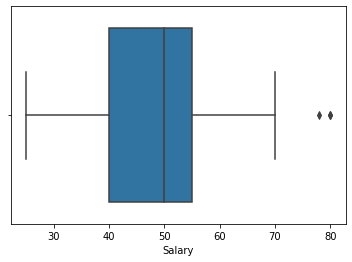

In [187]:
sns.boxplot(x = Survey['Salary'])

In [33]:
# Shapiro test to confirm if the column is normally distrubted or not 

stat, p = stats.shapiro(Survey['Salary'])
print(stat, p)

0.9565856456756592 0.028000956401228905


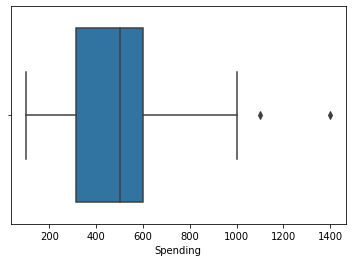

In [191]:
sns.boxplot(x = Survey['Spending'])

In [192]:
p2 = stats.shapiro(Survey['Spending'])
p2

(0.8777452111244202, 1.6854661225806922e-05)

In [ ]:
# As p value is less than 0.05 and box plot has skewness therefore column 'Spending' is not normally distrubted.

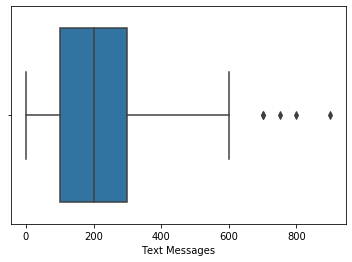

In [125]:
sns.boxplot(x = Survey['Text Messages'])

In [194]:
p3 = stats.shapiro(Survey['Text Messages'])
p3

(0.8594191074371338, 4.324040673964191e-06)

In [ ]:
# As p value is less than 0.05 and box plot has skewness therefore column 'Text Messages' is not normally distrubted.

# Problem 3

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging. In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet. The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles

In [35]:
df6 = pd.read_csv('A & B singles-1.csv')

In [36]:
df6.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [38]:
df6.describe(include='all')

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [43]:
df6.isnull().sum()

A    0
B    5
dtype: int64

In [52]:
df7 = df6.dropna()
df7.isnull().sum()

A    0
B    0
dtype: int64

# 3.1. For the A shingles, form the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet

In [221]:
#Ho =  Mean moisture content is equal or greater than 0.35 pound per 100 square feet.
#Ha =  Mean moisture content is less than 0.35 pound per 100 square feet.

# Null and Alternate Hypothesis for Shingle A
Null Hypothesis: Ho: u >= 0.35 
Alternate Hypothesis: Ha: u < 0.35

# 3.2. For the B shingles, form the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet

In [ ]:
#Ho =  Mean moisture content is equal or greater than 0.35 pound per 100 square feet.
#Ha =  Mean moisture content is less than 0.35 pound per 100 square feet.

# Null and Alternate Hypothesis for Shingle B
Null Hypothesis: Ho: u >= 0.35 
Alternate Hypothesis: Ha: u < 0.35

# 3.3. Do you think that the population means for shingles A and B are equal?

Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?


In [53]:
# We are going to conduct t sample t test ass the standard deviation is not known.
# We need to assume that the two groups should have same variance before t test
t , p_value = stats.ttest_ind(df7['A'],df7['B'])
print(t , p_value)
# as p value is greater than alpha (0.05) we 'Fail to reject' Null Hypothesis,
# so the population means for Shingle A and B are equal

0.985249977839441 0.3284577916404776


In [ ]:
# What assumption about the population distribution is needed in order to conduct the hypothesis tests above?
# We need to assume that the population is normally distributed in order to conduct the hypothesis tests above.